# 4.10 Coding Etiquette & Excel Reporting Part_1
This script contains the following points:
1. Import Data
2. Question 3
3. Question 4
4. Question 5
5. Task Proocedures
6. Export data

## Import Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data set
path=r'/Users/dariaperestiuk/Documents/02_02_24 Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9.final_part_1.pkl'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   product_id                  int64   
 1   product_name                object  
 2   aisle_id                    int64   
 3   department_id               int64   
 4   prices                      float64 
 5   order_id                    object  
 6   user_id                     object  
 7   eval_set                    object  
 8   order_number                int64   
 9   order_dow                   int64   
 10  order_hour_of_day           int64   
 11  days_since_prior_order      float64 
 12  add_to_cart_order           int64   
 13  reordered                   int64   
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

In [5]:
# Creating crosstab 
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [6]:
# Сopy crosstab to cliboard to past it to excel
crosstab.to_clipboard()

In [30]:
df.describe()

,product_id,aisle_id,department_id,prices,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,Age,Dependants,income
count,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,30356128.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00,32434212.00
mean,25577.78,71.22,9.92,11.98,17.14,2.74,13.42,11.10,8.35,0.59,33.05,11.98,10.40,49.47,1.50,99435.25
std,14096.14,38.20,6.28,495.43,17.53,2.09,4.25,8.78,7.13,0.49,25.15,83.19,7.13,18.49,1.12,43054.73
min,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,3.00,1.00,0.00,18.00,0.00,25903.00
25%,13535.00,31.00,4.00,4.20,5.00,1.00,10.00,5.00,3.00,0.00,13.00,7.39,6.00,33.00,1.00,66998.00
50%,25256.00,83.00,9.00,7.40,11.00,3.00,13.00,8.00,6.00,1.00,26.00,7.83,8.00,49.00,2.00,96612.00
75%,37935.00,107.00,16.00,11.30,24.00,5.00,16.00,15.00,11.00,1.00,47.00,8.26,13.00,65.00,3.00,127908.00
max,49688.00,134.00,21.00,99999.00,99.00,6.00,23.00,30.00,145.00,1.00,99.00,25005.42,30.00,81.00,3.00,593901.00


In [9]:
# Fix formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Question 3

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [39]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Last Name,Gender,State,Age,date_joined,Dependants,Marital_Status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,prior,1,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,prior,10,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
4,1000,Apricots,18,10,12.90,505689,138,prior,9,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest


In [42]:
df.spending_flag.head()

0    Low spender
1    Low spender
2    Low spender
3    Low spender
4    Low spender
Name: spending_flag, dtype: object

In [43]:
df['spending_flag'].value_counts(dropna = False)

Low spender     31798751
High spender      635461
Name: spending_flag, dtype: int64

In [12]:
# Create a new column "region" using loc function with mapping
df['region'] = 'West'

df.loc[df['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'East'

df.loc[df['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

df.loc[df['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [83]:
# Create a total regional customers filter
total_region_filter = df['region'].value_counts(dropna = False)

In [84]:
total_region_filter.head()

South      10801610
West        8300445
Midwest     7603810
East        5728347
Name: region, dtype: int64

In [15]:
df[['State', 'region']].head()

,State,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Minnesota,Midwest
3,Minnesota,Midwest
4,Minnesota,Midwest


In [16]:
df[['State', 'region']].tail()

,State,region
32434207,Alabama,South
32434208,Vermont,East
32434209,Vermont,East
32434210,Vermont,East
32434211,Vermont,East


In [77]:
# Create filter for spending habits
high_spenders = df[df['spending_flag'] == 'High spender']

In [73]:
low_spenders = df[df['spending_flag'] == 'Low spender']

In [78]:
# Group by spenders by region
high_spender_count = high_spenders.groupby('region').size()

In [74]:
low_spender_count = low_spenders.groupby('region').size()

In [79]:
# Check the output for high spender
high_spender_count.head()

region
East       108343
Midwest    156129
South      210182
West       160807
dtype: int64

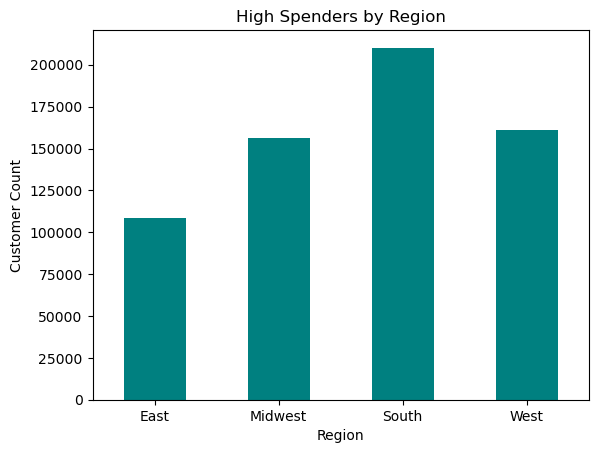

In [135]:
# Creating bar chart for high spenders and saving it as an objecet 
bar_high_spenders = high_spender_count.plot.bar(color = 'teal')
plt.title('High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()


In [62]:
# Saving as png
bar_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_high_spenders.png'))

In [75]:
# Check the output for low spender
low_spender_count.head()

region
East        5620004
Midwest     7447681
South      10591428
West        8139638
dtype: int64

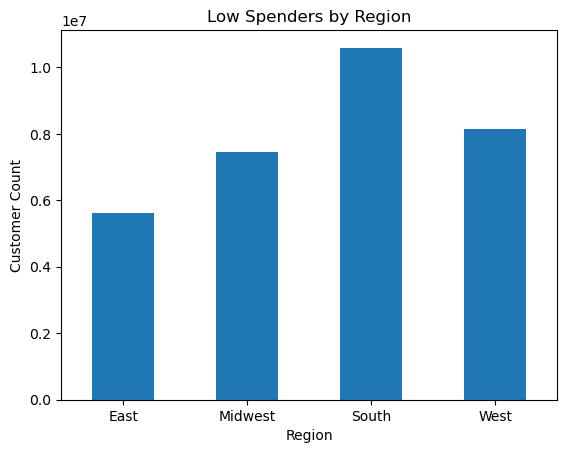

In [76]:
# Creating bar chart for low spenders and saving it as an objecet 
bar_low_spenders = low_spender_count.plot.bar()
plt.title('Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

In [81]:
# Saving as png
bar_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_low_spenders.png'))

In [89]:
# Create ratio for low spenders, %
low_spenders_ratio = (low_spender_count / total_region_filter)*100

In [90]:
low_spenders_ratio.head()

East      98.11
Midwest   97.95
South     98.05
West      98.06
dtype: float64

In [91]:
# Create ratio for high spenders, %
high_spenders_ratio = (high_spender_count / total_region_filter)*100

In [92]:
high_spenders_ratio.head()

East      1.89
Midwest   2.05
South     1.95
West      1.94
dtype: float64

## Question 4

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [99]:
# Create exclusion flag
df_activity = df['max_order'] < 5

In [100]:
df_activity.value_counts()

False    30992664
True      1441548
Name: max_order, dtype: int64

In [106]:
# Create new data set with orders >5
df_high_activity = df[~df_activity]

In [107]:
# Check output
df_high_activity.shape

(30992664, 35)

In [105]:
# Create new data set with orders <5
df_low_activity = df[df_activity]

In [108]:
# Check output
df_low_activity.shape

(1441548, 35)

In [111]:
# Export dataset as pickle format
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_act_set.pkl'))

In [112]:
# Export dataset as pickle format
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_act_set.pkl'))

## Question 5

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [ ]:
# Create stacked Bar Chart
region_spender_ratio_stacked_bar = region_spending.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
# Add Title and Labels
region_spender_ratio_stacked_bar.set_xlabel('Region')
region_spender_ratio_stacked_bar.set_ylabel('Percent')
region_spender_ratio_stacked_bar.set_title('High and Low Spender Ratio by Region')
region_spender_ratio_stacked_bar.legend(title= 'Spending Flag', loc='upper right')
plt.xticks(rotation=0)
plt.show()